# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distribuited feature

             x         fx  y
866  15.806676  16.298339  1
547  17.617727  18.246062  1
511   5.415409   4.823551  0
240  -2.680358  -2.633447  0
377   3.038879   1.822637  0


<AxesSubplot:xlabel='fx', ylabel='Count'>

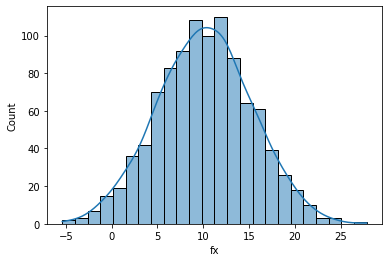

In [430]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'x':x, 'fx': fx,'y':y})
print(data.sample(5))

sns.histplot(data=data, x='fx', kde=True)

In [431]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'fx']
sample_class0 = data.loc[data['y'] == 0, 'fx']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
pred_class1 = data['fx'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
pred_class0 = data['fx'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

14.184170785176653
5.977153845749229
0.508
0.492
9.465958957935587


In [432]:
#comparing results
data['prob_class1'] = pred_class1
data['prob_class0'] = pred_class0
data['prediction_lda'] = np.where(data['prob_class1'] > data['prob_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[468  24]
 [  0 508]]
0.976
0.9548872180451128
1.0


<AxesSubplot:xlabel='fx', ylabel='prob_class1'>

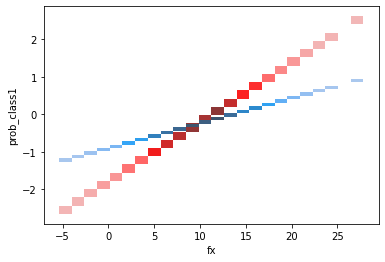

In [433]:
#graphing the probabilty
sns.histplot(data=data, x='fx', y='prob_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='prob_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 

### Cenario 2 - LDA with 3 normal distributed and uncorrelated features

            xA         xB        xC         fx  y
918  16.052362  -6.353651  5.830435  15.529146  1
787   8.679222  -6.087783 -6.908209  -4.316770  0
440   5.539492 -19.698181 -0.047907 -14.206595  0
438  -1.042429  -3.516438 -3.932197  -8.491064  0
549   3.755578  -8.618456  1.658128  -3.204751  0


<AxesSubplot:xlabel='value', ylabel='Count'>

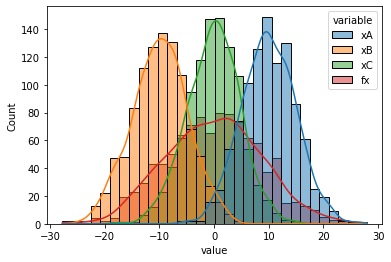

In [434]:
#feature A
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)


#feature C
meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

fx = xA + xB + xC

y = [1 if i >= fx.mean() else 0 for i in fx]
#y = [1 if i >= (meanA + meanB + meanC) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

In [435]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = pd.DataFrame({'mean_class1': sample_class1.mean()})
print(mean_class1)

mean_class0 = pd.DataFrame({'mean_class0': sample_class0.mean()})
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
X = data[['xA', 'xB', 'xC']]
X_corr = X.corr()
X_cov = X.cov()

#step 4: LDA classifier
pred_class1 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class1) - (0.5 * np.matmul(np.matmul(mean_class1.T, np.linalg.inv(X_cov)), mean_class1)).loc['mean_class1', 0] + np.log(prob_class1)
pred_class0 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class0) - (0.5 * np.matmul(np.matmul(mean_class0.T, np.linalg.inv(X_cov)), mean_class0)).loc['mean_class0', 0] + np.log(prob_class0)

    mean_class1
xA    12.313750
xB    -7.361731
xC     1.921469
    mean_class0
xA     7.614119
xB   -12.515361
xC    -2.201216
0.505
0.495


C:\Users\Kenji\AppData\Local\Temp\ipykernel_19496\3045497164.py:26: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.

C:\Users\Kenji\AppData\Local\Temp\ipykernel_19496\3045497164.py:27: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray

In [436]:
#comparing results
data['prob_class1'] = pred_class1
data['prob_class0'] = pred_class0
data['prediction_lda'] = np.where(data['prob_class1'] > data['prob_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[489   6]
 [  0 505]]
0.994
0.9882583170254403
1.0


<AxesSubplot:xlabel='fx', ylabel='prob_class1'>

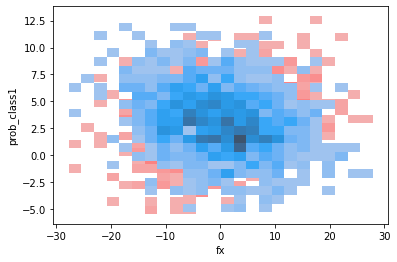

In [437]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='prob_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='prob_class0', kde=True)

The same visualization used with only 1 feature is not as insightful when increasing the number of features to 3..

In [438]:
import plotly.express as px

fig = px.scatter_3d(data,
                    x='xA' , y='xB', z='xC', color='prediction_lda')
fig.show()

In [439]:
lda.predict_log_proba(X)

array([[-4.10994040e-01, -1.08764530e+00],
       [-2.88520637e-03, -5.84960111e+00],
       [-4.30883379e+00, -1.35404850e-02],
       ...,
       [-2.65366064e-03, -5.93314176e+00],
       [-7.42209221e-02, -2.63759014e+00],
       [-1.87282123e+00, -1.66868914e-01]])

In [440]:
#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X, y)
lda.predict(X).tolist()

data['prediction_sklearn'] = lda.predict(X).tolist()
data['prob1_sklearn'] = lda.predict_proba(X)[:,1]
data['prob0_sklearn'] = lda.predict_proba(X)[:,0]


#cases of divergence (why?)
#data.loc[data['prediction_lda'] != data['prediction_sklearn']]
data.head(3)

,xA,xB,xC,fx,y,prob_class1,prob_class0,prediction_lda,prediction_sklearn,prob1_sklearn,prob0_sklearn
0,9.720033,-10.244248,-0.549512,-1.073727,0,3.113355,3.272015,0,0,0.37857,0.62143
1,9.262645,-21.088149,0.711742,-11.113762,0,6.401188,8.456354,0,0,0.00255,0.99745
2,5.116813,0.751170,2.334351,8.202334,1,-2.486653,-4.056614,1,1,0.98894,0.01106


### Cenario 3 - LDA with 2 normal distributed and high correlated features

            xA         xB        xC         fx  y
446  14.519438  14.113027  1.508634  27.913860  1
461   0.572646   1.386820 -8.462446   1.277531  0
48    2.131226   1.671846 -2.144712   4.317761  0
925   3.133274   3.192189  8.489768   4.957716  0
722   0.224582   1.433691 -6.448948   2.163487  0


<AxesSubplot:xlabel='value', ylabel='Count'>

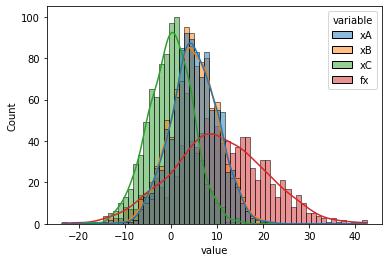

In [441]:
#feature A
meanA, stdA = 5, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = 0, 1
xB = xA + np.random.normal(meanB, stdB, 1000)

#class
error = np.random.normal(0, 1, 1000)
fx = xA + xB + error

y = [1 if i >= (meanA + meanB) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

### Cenario 3 - LDA with 1 non-normal distribuited feature and 1 class 

### Cenario 4 - LDA with 1 normal distribuited feature and 1 multi-class 